In [16]:
import mysql.connector as sql

In [17]:
db = sql.connect(host='localhost', user='root',password='mysql',database='hr') 

In [18]:
mcr =  db.cursor()

# TASK1

In [19]:
sql = "select country_name, region_name from countries\
    join  regions on  countries.region_id = regions.region_id\
    group by country_name"
mcr.execute(sql)
res = mcr.fetchall()
res

[('Belgium', 'Europe'),
 ('Switzerland', 'Europe'),
 ('Germany', 'Europe'),
 ('Denmark', 'Europe'),
 ('France', 'Europe'),
 ('Italy', 'Europe'),
 ('Netherlands', 'Europe'),
 ('United Kingdom', 'Europe'),
 ('Argentina', 'Americas'),
 ('Brazil', 'Americas'),
 ('Canada', 'Americas'),
 ('Mexico', 'Americas'),
 ('United States of America', 'Americas'),
 ('Australia', 'Asia'),
 ('China', 'Asia'),
 ('HongKong', 'Asia'),
 ('India', 'Asia'),
 ('Japan', 'Asia'),
 ('Singapore', 'Asia'),
 ('Egypt', 'Middle East and Africa'),
 ('Israel', 'Middle East and Africa'),
 ('Kuwait', 'Middle East and Africa'),
 ('Nigeria', 'Middle East and Africa'),
 ('Zambia', 'Middle East and Africa'),
 ('Zimbabwe', 'Middle East and Africa')]

# TASK2

In [20]:
import pandas as pd

In [79]:
New_Table = pd.read_sql_query("select country_id as 'Countries' ,count(employee_id) as 'Number of Employee' from employees\
    join departments on  employees.department_id= departments.department_id\
    join  locations on locations.location_id = departments.location_id \
    group by country_id\
    order by count(employee_id) desc",db)

C:\Users\yogesh\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [80]:
New_Table

,Countries,Number of Employee
0,US,68
1,UK,35
2,CA,2
3,DE,1


In [81]:
from sqlalchemy import create_engine

In [82]:
# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost', user='root',pw='mysql',db='hr'))

In [83]:
New_Table.to_sql('new_table', engine, index=False) # employee details is the name of the table 

4

# TASK3

In [34]:
import mysql.connector as sql
db = sql.connect(host='localhost', user='root',password='mysql',database='hr') 
mcr =  db.cursor()
Country_Wise = "select country_id as 'Countries' ,count(employee_id) as 'Number of Employee' from employees\
    join departments on  employees.department_id= departments.department_id\
    join  locations on locations.location_id = departments.location_id \
    group by country_id\
    order by count(employee_id) desc"
mcr.execute(Country_Wise)
count_wise=mcr.fetchall()
City_Wise = "select city as 'City' ,count(employee_id) as 'Number of Employee' from employees\
    join departments on  employees.department_id= departments.department_id\
    join  locations on locations.location_id = departments.location_id \
    group by city\
    order by count(employee_id) desc"
mcr.execute(City_Wise)
city_wise=mcr.fetchall()


In [37]:
A= pd.DataFrame(count_wise,columns=['Country','Employee Count'])
B= pd.DataFrame(city_wise,columns=['City','Employee Count'])

In [44]:
import matplotlib.pyplot as plt        

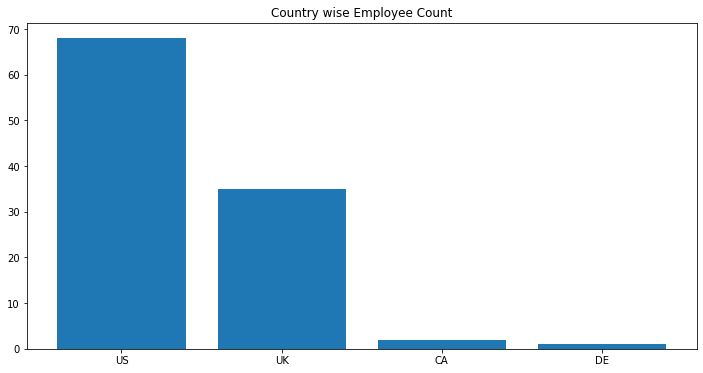

In [57]:
plt.figure(figsize=(12,6))
plt.bar(A['Country'], A['Employee Count'])       # To build bar chart
plt.title("Country wise Employee Count")         # Title name
plt.show()

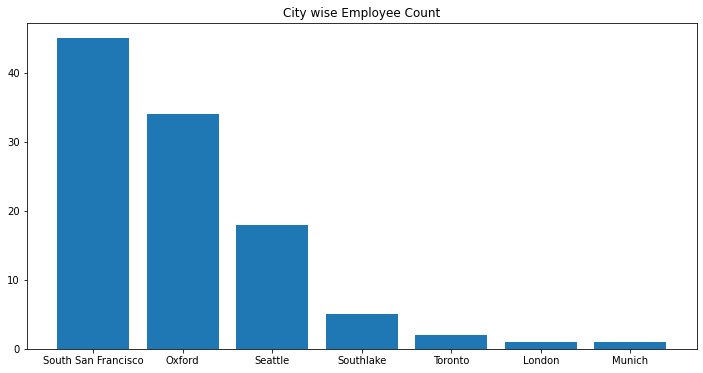

In [55]:
plt.figure(figsize=(12,6))
plt.bar(B['City'], B['Employee Count']) 
plt.title("City wise Employee Count")         # Title name
plt.show()